## Step - 3: A Framework for Unlocking and Linking WWII Japanese American Incarceration Biographical Data - Data Visualization

In the previous two modules we explored ways to manipulate and structure data to prepare the data for modeling and visualization.

As seen below there are several tools (i.e., libraries) that will need to be imported into your jupyter notebook to model the data. Once these libraries have been imported the next step is to import your csv files into your notebook. These files can be ones created separately in an Excel spreadsheet that were then saved as a comma separated value (csv) file, or they can be datasets manipulated in a jupyter notebooks (as we did in part 2), or even a combination of the both. Keep in mind, your datasets can still be manipulated in your jupyter notebook as we are modeling since both pandas and numpy are being imported into the notebook. 

In [1]:
# import the following libraries for visualization purposes
import pandas as pd
import networkx
import numpy as np
import geopandas as gpd
import shapely as shp
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.express as px
import plotly

import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# # Using plotly + cufflinks in offline mode
# import cufflinks
# cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# import matplotlib library
import matplotlib.pyplot as plt

# import bokeh library for network analysis
from bokeh.io import output_notebook, show, save

# the libraries below are needed for Network Visualization
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

# these are needed for Geo Map visualization below
import plotly.figure_factory as ff
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)    

In [2]:
# Import the csv data files
fullstackeddf = pd.read_csv('python-fullmovements-stacked.csv',dtype=object,na_values=[],keep_default_na=False)
pathsdf = pd.read_csv('python-paths.csv',dtype=object,na_values=[],keep_default_na=False)
totalsdf = pd.read_csv('python-totals.csv',dtype=object,na_values=[],keep_default_na=False)
#totalsdf['total'] = totalsdf['total'].astype(np.int64) #have to change the type for total to integer


If you find that you are not able to import a library into your notebook then it is likely you will need to install the library. A python library can be installed by using !pip install (and the name of the library). Once the library has been installed then the library will need to be imported into the notebook, as shown below.  

In [3]:
# Below is an example of an inline installation of a python library. Jupyter Notebooks makes it easy to install libraries on the whim. 
# Note, if installing several packages this could consume a lot of installation time. c
# The cufflinks package handles temp objects which is a pandas.series dataframe 'df' created above which does not have a iplot method when not linked to plotly. 
# We need cufflinks to link plotly to pandas and add the iplot method:
!pip install cufflinks
# import cufflinks now
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

### Plotly Maps

Plotly offers a variety of tools to model geographical data in unique ways. For example, the first three maps use Plotly's scatter_geo feature to plot points. Whereas, the fourth visualization still harnesses Plotly's scatter_geo but maps count data so that we can view relative sizes at each location. Other features of Plotly are scattergeo and .add_trace. These two features can be used together, as shown in the fifth, sixth, and seventh map, to model and visualize paths. 

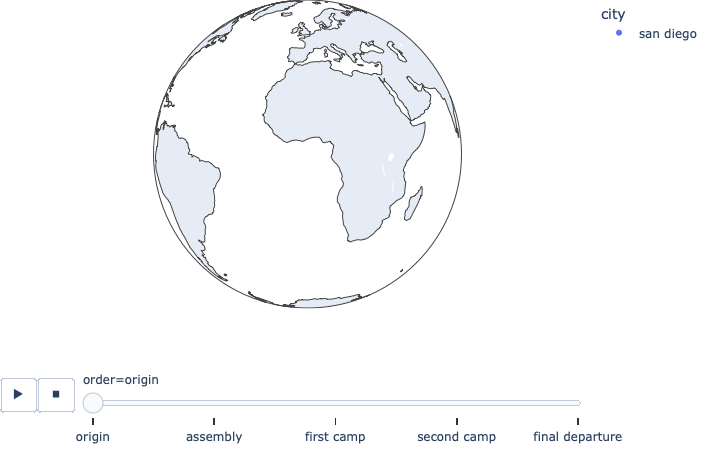

In [4]:
# The below command will map the locations of George Kuratomi
kuratomi = fullstackeddf[fullstackeddf['name'].str.contains('kuratomi')]

kuratomi = fullstackeddf[fullstackeddf['name'].str.contains('kuratomi')]
map1 = px.scatter_geo(kuratomi, lat="lat", lon="long", color="city",
                     hover_name="name",
                     animation_frame="order",
                     projection="orthographic")
map1.update_layout(height=450, margin={"r":0,"t":0,"l":0,"b":0})
map1.show()

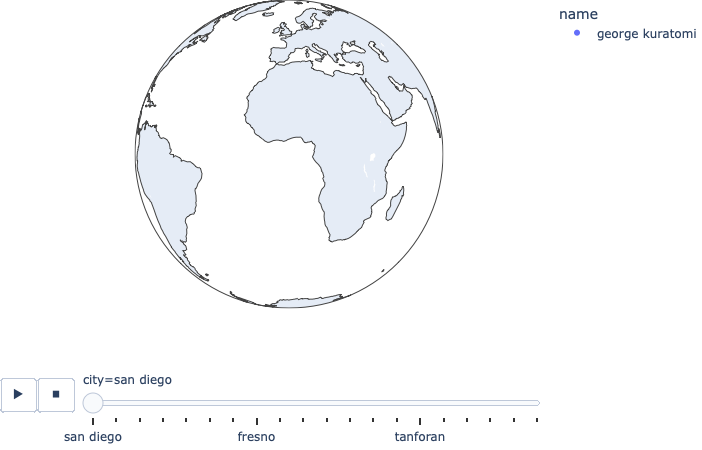

In [5]:
# The below command will only map data that contain california
california = fullstackeddf[fullstackeddf['state'].str.contains('california')]

map2 = px.scatter_geo(california, lat="lat", lon="long", color="name",
                     hover_name="name",
                     animation_frame="city",
                     projection="orthographic")
map2.update_layout(height=450, margin={"r":0,"t":0,"l":0,"b":0})
map2.show()

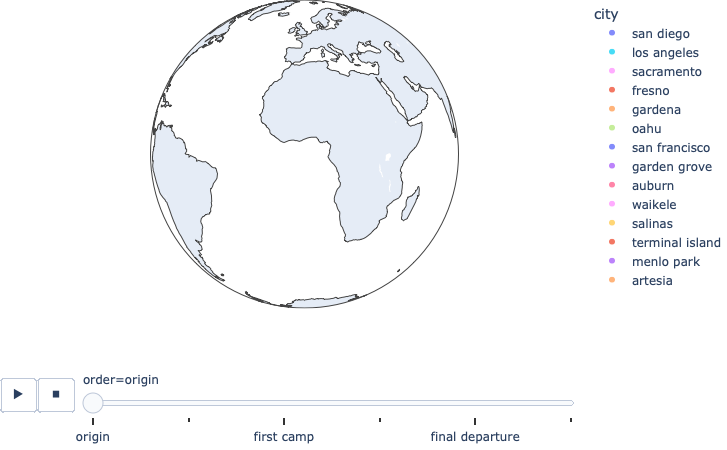

In [6]:
# The below command will map all of the locations for all movements 
map3 = px.scatter_geo(fullstackeddf, locationmode='USA-states',
                        lat = 'lat',
                        lon = 'long',
                        hover_name="name",
                        projection = 'orthographic',
                        color = 'city',
                        opacity = .8,
                        animation_frame="order",
                        )
map3.update_layout(height=450, margin={"r":0,"t":0,"l":0,"b":0})
map3.show()


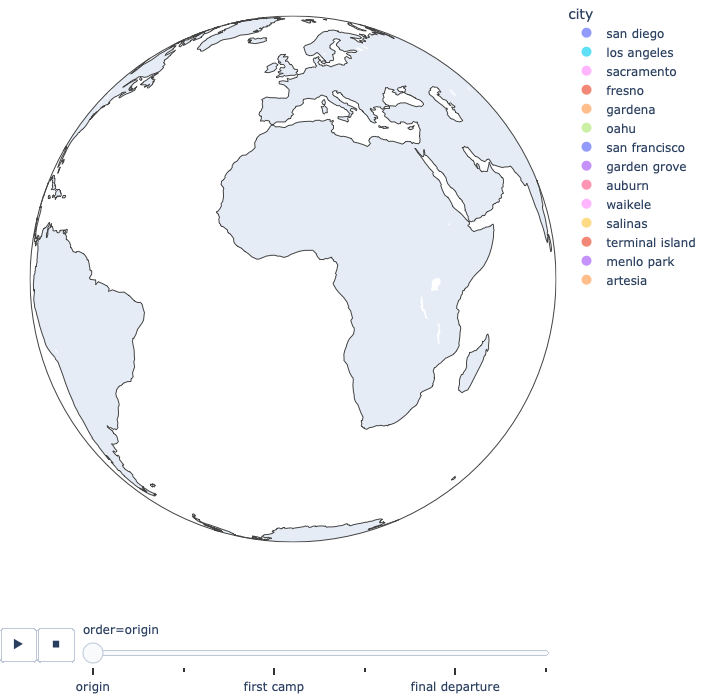

In [7]:
# The below command will map the relative size of each location 
fullstackeddf['counts'] = fullstackeddf.groupby(['city'])['order'].transform('count')
map4 = px.scatter_geo(fullstackeddf, lat="lat", lon="long", color="city",
                     hover_name="state", size='counts',
                     animation_frame="order",
                     projection="orthographic")
map4.update_layout(height=700, margin={"r":0,"t":0,"l":0,"b":0})
map4.show()

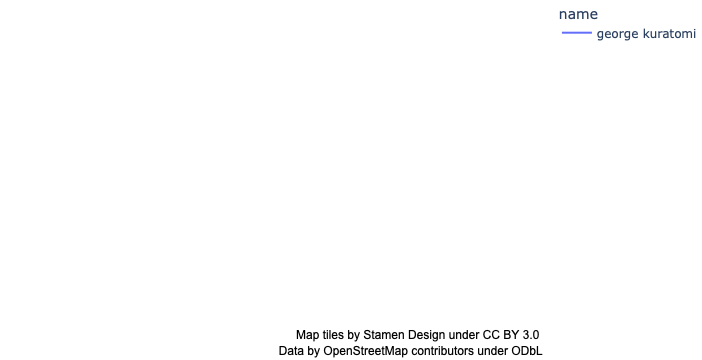

In [8]:
# convert variables to numeric using pd.to_numeric function
fullstackeddf["lat"] = pd.to_numeric(fullstackeddf["lat"])
fullstackeddf["long"] = pd.to_numeric(fullstackeddf["long"])

## The below command will plot the paths of George Kuratomi
kuratomipoints = fullstackeddf[fullstackeddf['name'].str.contains('kuratomi')]

map5 = px.line_mapbox(kuratomipoints, lat="lat", lon="long", color="name", zoom=3, height=300)

map5.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=4, mapbox_center_lat = 41,
    margin={"r":0,"t":0,"l":0,"b":0})

map5.show()

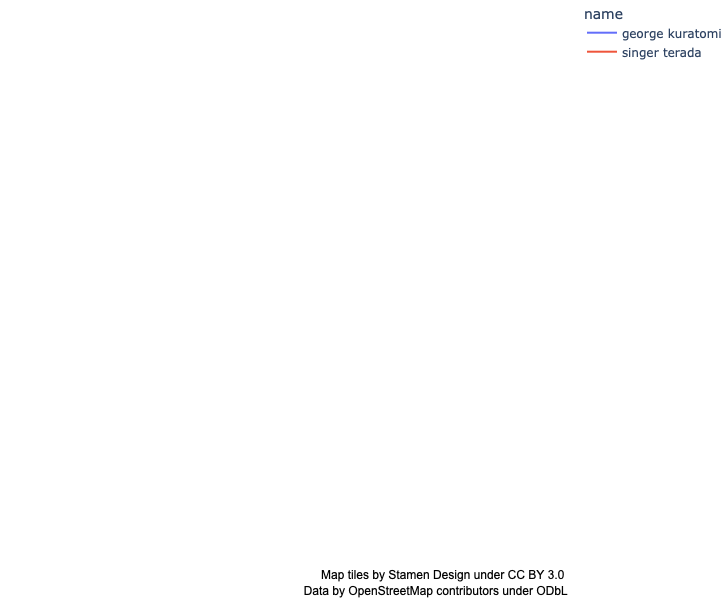

In [9]:
# The below command will plot the paths of George Kuratomi and Singer Terada
kuratomiandterada = fullstackeddf[fullstackeddf['name'].str.contains('george kuratomi')| fullstackeddf['name'].str.contains('terada')]

map6 = px.line_mapbox(kuratomiandterada, lat="lat", lon="long", color="name", zoom=3, height=600)

map6.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=4, mapbox_center_lat = 35,
    margin={"r":0,"t":0,"l":0,"b":0})

map6.show()

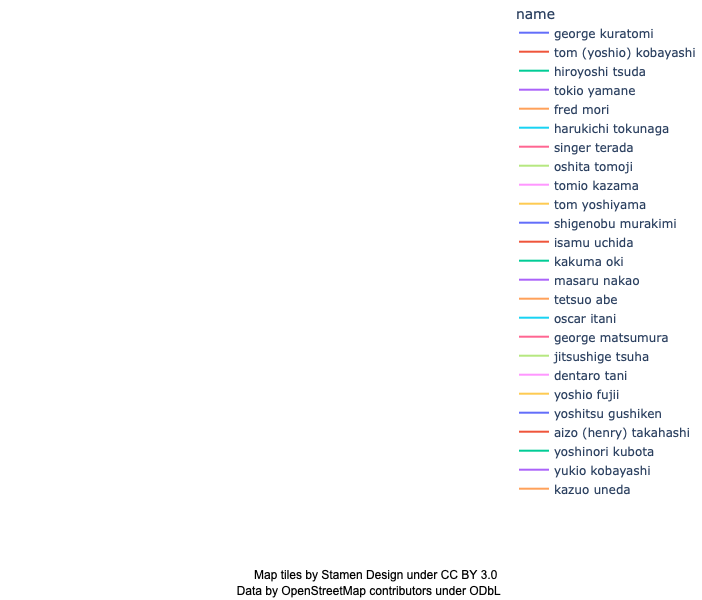

In [10]:
# The below command will map the paths for all 25 individuals 

map7 = px.line_mapbox(fullstackeddf, lat="lat", lon="long", color="name", zoom=3, height=600)

map7.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=4, mapbox_center_lat = 35,
    margin={"r":0,"t":0,"l":0,"b":0})

map7.show()

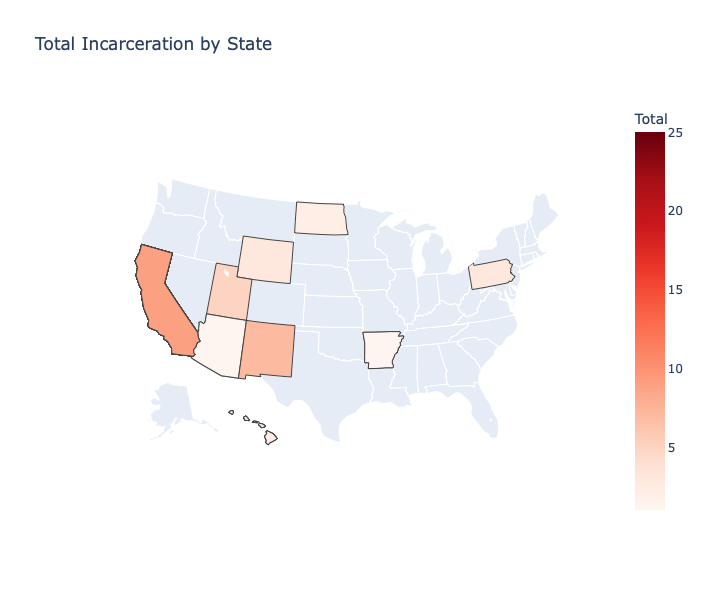

In [11]:
# The command below creates a choropleth map based on number in each state. 
totalsdf['code'] = totalsdf['code'].str.upper()

fig9 = go.Figure(data=go.Choropleth(
    locations=totalsdf['code'], # Spatial coordinates
    z = totalsdf['total'].astype(float), # Data to be color-coded
    locationmode = 'USA-states',# Set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Total",
))

fig9.update_layout(
    title_text = 'Total Incarceration by State',
    height=600,
    geo_scope='usa', # limit map scope to USA
)

fig9.show()

## Non-Geospatial Visualizations

### Plotly Graphs

The following visualizations are graphs created using an assortment of Plotly features. The graphs were created using the same datasets created to model the geographical data. Though the datasets were created to model spatial data, this is a great example of how the datasets can be utilized in other ways employing new tools.  

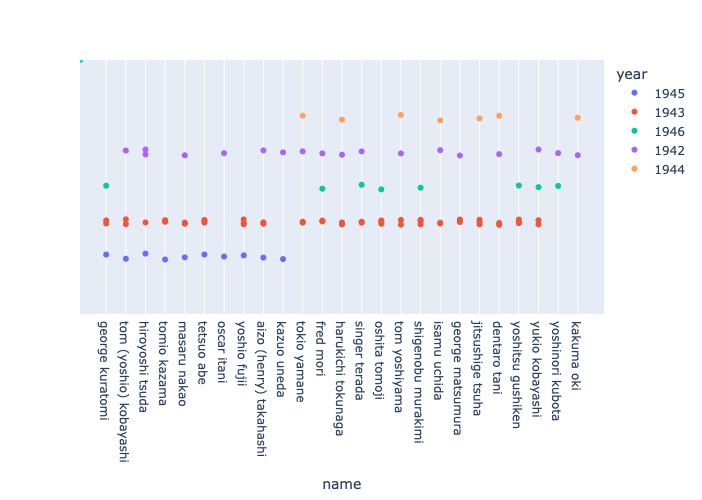

In [12]:
# The command below creates a strip graph that plots points based on selected variables
fig1 = px.strip(pathsdf, x='name',color='year', hover_name='year', height=500)
fig1

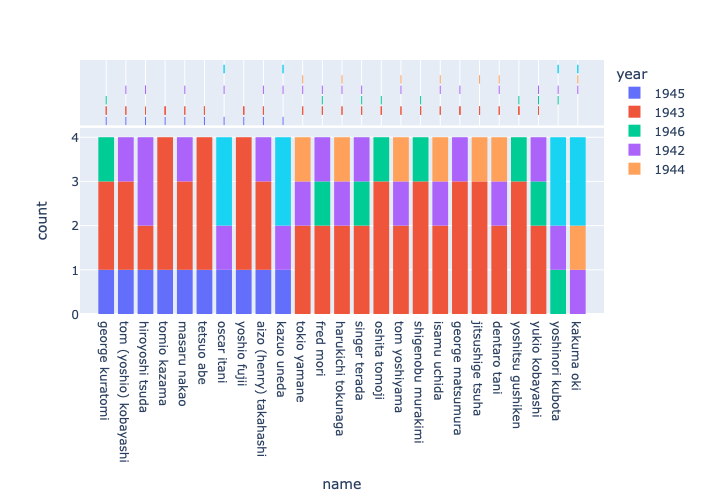

In [13]:
# The command below creates a histogram from the selected variables
fig2 = px.histogram(pathsdf, x='name',color='year', hover_name='dates', marginal='rug', height=500)
fig2

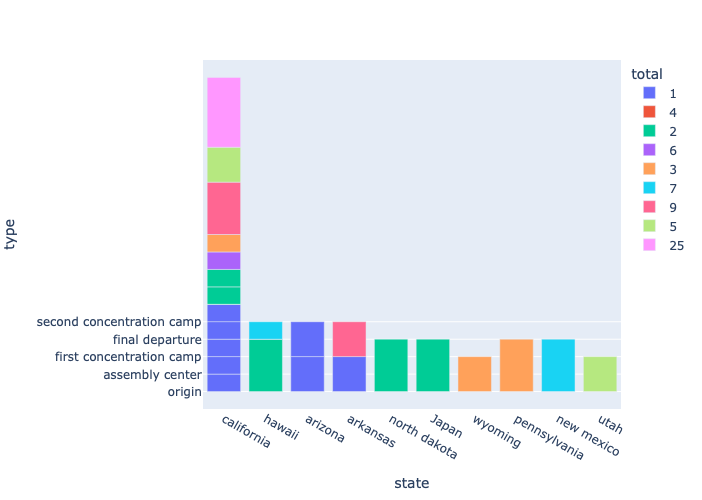

In [14]:
# The command below creates a simple bar graph based on your selected variables
fig3 = px.bar(totalsdf, color='total', x='state', y='type', hover_name='state', height=500) # the height can be adjusted and width added by adding a comma width=500
fig3

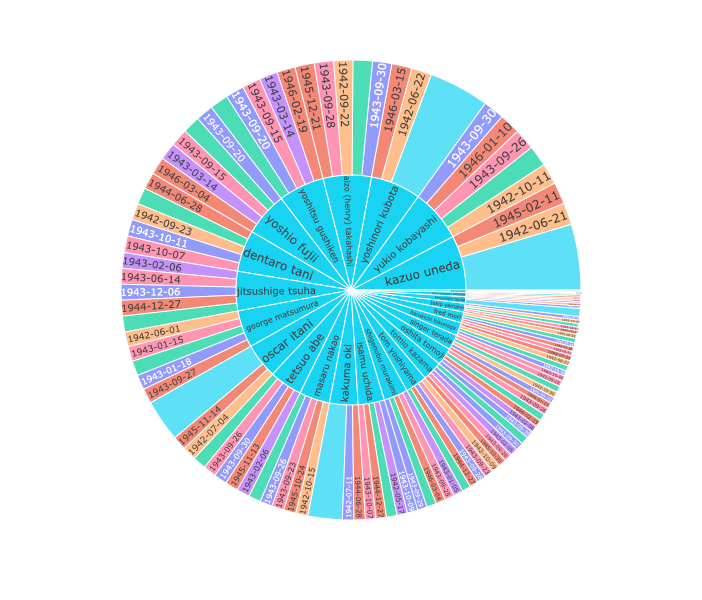

In [15]:
# The command below creates a sunburst graph. 
fig5 = px.sunburst(fullstackeddf, values='uid', path=['name','dates'], color='order', hover_name='name', height=600) #click on a name in the center and it will show the data specific to that person
fig5

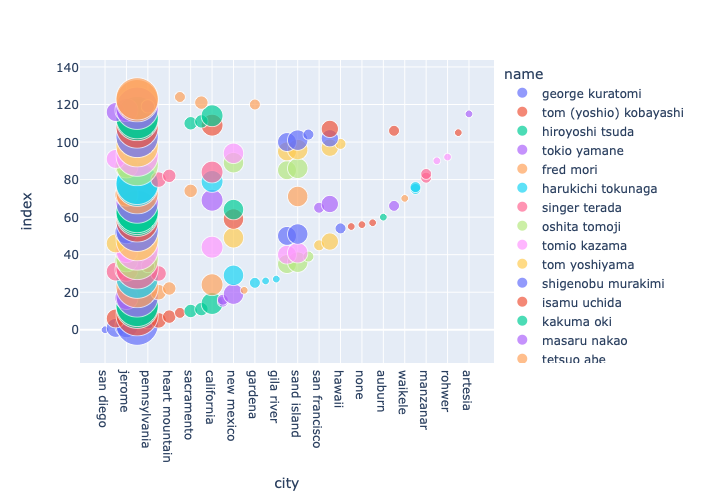

In [16]:
# The below command creates a basic scatterplot 
fig6 = px.scatter(fullstackeddf, x='city', size='counts', color='name', size_max=30, height=500)
fig6

In [17]:
# The command below shows you json elements
fig6.show("json")

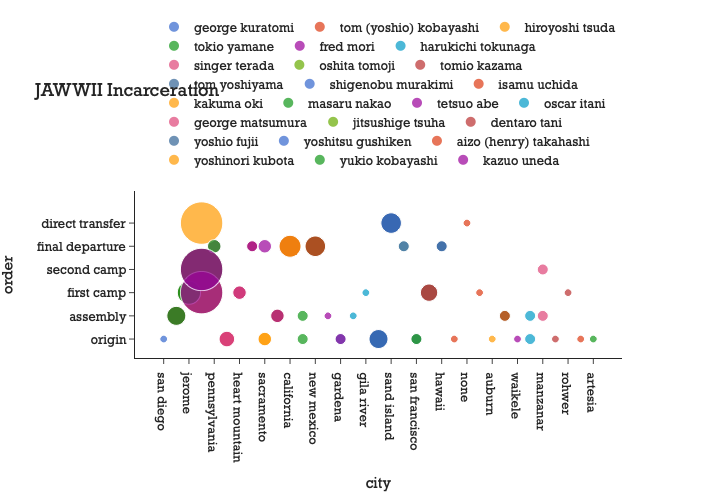

In [18]:
# The below command will graph a more clean scatterplot showing the size for each city and based on the order
fig7 = px.scatter(fullstackeddf, y='order', x='city', size='counts', color='name', size_max=30, height=500,
                  width=900, template='simple_white',
                  color_discrete_sequence=px.colors.qualitative.G10,
                  title="JAWWII Incarceration",
                  labels=dict(
                      city='city', count='count',
                      name='name', order='order'))
fig7.update_layout(font_family="Rockwell",
                  legend=dict(orientation='h', title='', y=1.1, x=1, xanchor='right', yanchor='bottom'))

fig7.show()

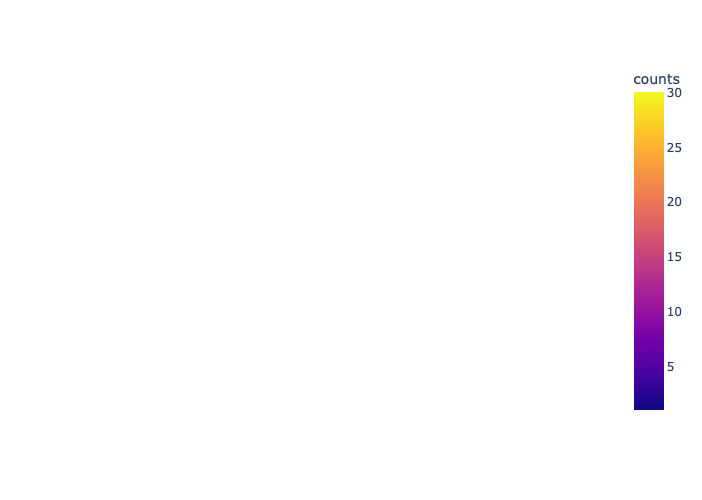

In [19]:
# The below command will create a 3d graph of the variables you plug into the x, y, and z
fig8 = px.scatter_3d(fullstackeddf, x="state", y="order", z="dates", color="counts", size="counts", hover_name="order", #the color and size is based on the counts variable
                   size_max=20, height=500, width=900, color_discrete_map = {"city": "blue", "order": "green", "dates":"red"})
fig8.show()


## End of Modules

click here to go to index page

#### ***NOTE: We'd love to get your feedback and/or advice on how we can improve our modules and instruction. Thanks for stopping by!